# Photosythetically Active Radiation Measurements

## Definition and units

Photosynthetically Active Radiation (PAR) is the spectral range of electromagnetic radiation that is utilized by plants for photosynthesis.  This range is 400 to 700 $\mathrm{\mu m}$.  This is a narrower range of radiation than visible shortwave radiation measured by pyranometers, which is 200 to 4000 $\mathrm{\mu m}$.  PAR is also referred to as Photosynthetic Photon Flux Density (PPFD).  

_Add a figure showing irradiance and PAR_

Although PAR can be expressed as a radiation _flux density_, both PAR and PPFD are often given as the number of photons per unit area per unit time.  In SI units this is $\mathrm{\mu mol\,m^{-2}\,s^{-1}}$, micromoles of photons per square-meters per second.  One mole of photons is $6.022 \times 10^{23}$ photons, where $6.022 \times 10^{23}$ is the Avogadro constant, represented as $\mathrm{N_A}$.

In early publications, the obsolete units of micro-Einsteins per square-meter per second $\mathrm{\mu E\,m^{-2}\,s^{-1}}$ is sometimes used.  Einstein units have two conflicting definitions.  In biological literature, $1\,\mathrm{E}$ is equivalent to $1\,\mathrm{mol}$ of photons.  However, the original definition is dependent on the frequency of radiation:

$$
1\,\mathrm{E} = \mathrm{N_A} h \nu \approx 3.99 \times 10^{-10}\: \nu \; \mathrm{J}
$$

where $h$ is the Planck constant ($6.62607015 \times 10^{−34}\, \mathrm{J\,s}$), and $\nu$ is frequency.

## Converting

Solar radiation is usually expressed as a _flux density_ of radiation energy with units $\mathrm{W\,m^{-2}}$.  This needs to be converted to a quantum measure of photon flux density.

Mathematically, PAR as a radiation flux density ($F_{PAR}$);

$$
F_{PAR} = \int_{400 \mathrm{nm}}^{700 \mathrm{nm}} \frac{d E(\lambda)}{d \lambda} \,d\lambda
$$

PAR as a photon flux density is;
$$
Q_{PAR} = \int_{400 \mathrm{nm}}^{700 \mathrm{nm}} \frac{d E(\lambda)}{d \lambda}  \frac{\lambda}{hc} \,d\lambda
$$

The short wave irradiance is;

$$
F_{SW} = \int_{200 \mathrm{nm}}^{4000 \mathrm{nm}} \frac{d E(\lambda)}{d \lambda} \,d\lambda
$$

Converting broadband radiative flux density to photon flux density using the formulae above requires the distribution of spectral irradiance to be known.  In many cases this is not possible.  So empircal broadband conversion factors must be used.

$$
Q_{PAR} = \frac{F_{PAR}}{F_{SW}} \frac{Q_{PAR}}{F_{PAR}} F_{SW}
$$

Where $\frac{F_{PAR}}{F_{SW}}$ is the conversion factor to estimate measured shortwave irradiance to PAR, and $\frac{Q_{PAR}}{F_{PAR}}$ converts PAR radiative flux density to a photon flux density.

In Stroeve et al (2020), they use separate conversion factors for open water and under ice light because the spectral irradiance after transmission through the snow and ice is different from that in open water.

_Add figure_?

The conversion factors are given in the following table.

| Surface-type| $\frac{F_{PAR}}{F_{SW}}$ | $\frac{Q_{PAR}}{F_{PAR}}$ |
|-------------|--------------------------|---------------------------|
| Open Water | 0.5 | $4.6 \pm 0.03$ |
| Underice | $0.79 \pm 0.003$ |  $4.44 \pm 0.005$ | 

The conversion factors for open water are taken from Blah and Blah, and Morel and Smith (1974).  The conversion factors for Underice light are estimated from data collected during the Greenedge campaign

## References
[Hershey, D.R., 1991, The American Biology Teacher, Vol. 53, No. 6 (Sep., 1991), pp. 351-353 (3 pages)
https://doi.org/10.2307/4449324](https://doi.org/10.2307/4449324)

Stroeve, Julienne, Martin Vancoppenolle, Gaelle Veyssiere, Marion Lebrun, Giulia Castellani, Marcel Babin, Michael Karcher, Jack Landy, Glen E. Liston, and Jeremy Wilkinson. “A Multi-Sensor and Modeling Approach for Mapping Light Under Sea Ice During the Ice-Growth Season.” Frontiers in Marine Science 7 (2021). [https://doi.org/10.3389/fmars.2020.592337](https://doi.org/10.3389/fmars.2020.592337).

Morel André , Smith Raymond C. , (1974), Relation between total quanta and total energy for aquatic photosynthesis, Limnology and Oceanography, 4, doi: 10.4319/lo.1974.19.4.0591.


In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
avogadro = 6.022e23

rad2quanta = {
    "blue water": 2.35e18,
    "blue-green water": 2.5e18,
    "green water": 2.65e18,
}

for name, value in rad2quanta.items():
    print(f"{name:16s}: {value/avogadro:.3e}")

blue water      : 3.902e-06
blue-green water: 4.151e-06
green water     : 4.401e-06


In [4]:
def sw2par_underice(irradiance: float) -> float:
    """Returns estimated photosynthetic active 
    radiation portion of SW flux density beneath a sea 
    ice column in W/m^2

    Parameters
    ----------
    irradiance : broadband SW flux density in W/m2

    Returns
    -------
    par in W/m2

    Broadband SW flux density is integral of spectral irradiance
    between 200 nm and 4000 nm.  PAR radiative flux density is
    the integral of spectral irradiance over 400 nm to 700 nm.  
    The bulk conversion factor for underice light is estimated
    from measurements made during the Greenedge campaign.

    F_PAR / F_SW = 0.79 +/- 0.003

    E.g. F_PAR is 79% of broadband SW radiative flux density
    
    See Stroeve, Julienne, Martin Vancoppenolle, Gaelle Veyssiere, 
    Marion Lebrun, Giulia Castellani, Marcel Babin, Michael Karcher, 
    Jack Landy, Glen E. Liston, and Jeremy Wilkinson. 
    “A Multi-Sensor and Modeling Approach for Mapping Light Under 
    Sea Ice During the Ice-Growth Season.” 
    Frontiers in Marine Science 7 (2021). 
    https://doi.org/10.3389/fmars.2020.592337.
    """
    SW2PAR = 0.79
    return irradiance * SW2PAR


def sw2par_openwater(irradiance: float) -> float:
    """Returns the estimated phtosynthetically active portion
    of broadband SW irradiance for open sea water in W/m2

    Parameters
    ----------
    irradiance : broadband SW flux density in W/m2

    Returns
    -------
    par in W/m2

    Broadband SW flux density is integral of spectral irradiance
    between 200 nm and 4000 nm.  PAR radiative flux density is
    the integral of spectral irradiance over 400 nm to 700 nm.  
    The conversion factor is taken from Frouin and Pinker (1995).  
    They give the range of conversion factors as 0.45 to 0.5.

    F_PAR / F_SW = 0.5

    E.g. PAR is 50 % of SW flux.

    Frouin, Robert, and Rachel T. Pinker. “Estimating Photosynthetically 
    Active Radiation (PAR) at the Earth’s Surface from Satellite 
    Observations.” Remote Sensing of Environment, Remote Sensing of 
    Land Surface for Studies of Global Chage, 51, no. 1 
    (January 1, 1995): 98–107. https://doi.org/10.1016/0034-4257(94)00068-X.
    """
    SW2PAR = 0.5
    return irradiance * SW2PAR


def rad2quanta_underice(irradiance: float) -> float:
    """Returns an irradiance in W/m2 as quanta/m2/s for
    underice light

    Parameter
    ---------
    irradiance : irradiance in W/m2

    Returns
    -------
    quantum measure of irrandiance as micromoles photons/m2/s

    The quantum measure of radiative flux density for PAR is
    given as:
    
    $$
    Q = \frac{1}{hc}\int_{400 nm}^{700 nm} I(\lambda) \lambda d\lambda
    $$

    where $h$ is the Planck constant and $c$ is the speed of light.

    The conversion factor for broadband SW used here is from the Greenedge campaign

    Q_PAR / F_PAR = 4.44 +/- 0.005 micromoles photons per J
    """
    RAD2QUANTA = 4.44
    return irradiance * RAD2QUANTA


def rad2quanta_openwater(irradiance: float) -> float:
    """Returns an irradiance in W/m2 as quanta/m2/s for
    underice light

    Parameter
    ---------
    irradiance : irradiance in W/m2

    Returns
    -------
    quantum measure of irrandiance as micromoles photons/m2/s

    The quantum measure of radiative flux density for PAR is
    given as:
    
    $$
    Q = \frac{1}{N_A hc}\int_{400 nm}^{700 nm} I(\lambda) \lambda d\lambda
    $$

    where $h$ is the Planck constant and $c$ is the speed of light.

    The conversion factor for broadband SW used here is from Morel and Smith

    Q_PAR / F_PAR = 4.44 +/- 0.005 micromoles photons per J

    This comes from the Green water estimate in Table 2 of Morel and Smith (1974),
    which gives the conversion factor in units quanta / J.  Dividing by the 
    Avogadro constant (6.022e23) gives the CF in micromoles per J
    """
    RAD2QUANTA = 4.44
    return irradiance * RAD2QUANTA


def get_qpar_openwater(irradiance: float) -> float:
    """Returns PAR in micromoles per meter squared per second"""
    return rad2quanta_openwater( sw2par_openwater( irradiance) )

def get_qpar_underice(irradiance: float) -> float:
    """Returns PAR in micromoles per meter squared per second"""
    return rad2quanta_underice( sw2par_underice( irradiance) )



<>:69: SyntaxWarning: invalid escape sequence '\i'
<>:98: SyntaxWarning: invalid escape sequence '\i'
<>:69: SyntaxWarning: invalid escape sequence '\i'
<>:98: SyntaxWarning: invalid escape sequence '\i'
/tmp/ipykernel_429338/1485950616.py:69: SyntaxWarning: invalid escape sequence '\i'
  """Returns an irradiance in W/m2 as quanta/m2/s for
/tmp/ipykernel_429338/1485950616.py:98: SyntaxWarning: invalid escape sequence '\i'
  """Returns an irradiance in W/m2 as quanta/m2/s for


<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_429338/1998097127.py:14: SyntaxWarning: invalid escape sequence '\m'
  ax[0].set_ylabel("$\mathrm{Q_{PAR}\; \mu mol\,m^{-2}\,s^{-1}}$")
/tmp/ipykernel_429338/1998097127.py:15: SyntaxWarning: invalid escape sequence '\m'
  ax[0].set_xlabel("$\mathrm{F_{PAR}\; W\,m^{-2}}$")
/tmp/ipykernel_429338/1998097127.py:24: SyntaxWarning: invalid escape sequence '\m'
  ax[1].set_ylabel("$\mathrm{F_{PAR}\; W\,m^{-2}}$")
/tmp/ipykernel_429338/1998097127.py:25: SyntaxWarning: invalid escape sequence '\m'
  ax[1].set_xlabel("$\mathrm{F_{SW}\; W\,m^{-2}}$")


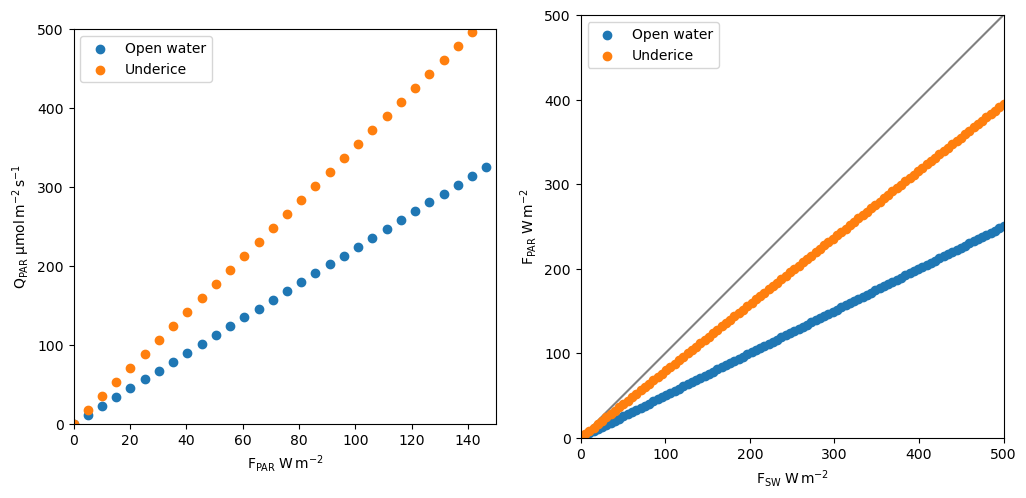

In [21]:
irradiance = np.linspace(0,500,100)

par_underice = sw2par_underice(irradiance)
par_openwater = sw2par_openwater(irradiance)

qpar_underice = get_qpar_underice(irradiance)
qpar_openwater = get_qpar_openwater(irradiance)


fig, ax = plt.subplots(1, 2, figsize=(12,7))

ax[0].scatter(irradiance, qpar_openwater, label="Open water")
ax[0].scatter(irradiance, qpar_underice, label="Underice")
ax[0].set_ylabel("$\mathrm{Q_{PAR}\; \mu mol\,m^{-2}\,s^{-1}}$")
ax[0].set_xlabel("$\mathrm{F_{PAR}\; W\,m^{-2}}$")
ax[0].set_xlim(0,150)
ax[0].set_ylim(0,500)
ax[0].set_aspect(140/500)
ax[0].legend()

ax[1].scatter(irradiance, par_openwater, label="Open water")
ax[1].scatter(irradiance, par_underice, label="Underice")
ax[1].plot([0,500],[0,500], c="0.5", zorder=0)
ax[1].set_ylabel("$\mathrm{F_{PAR}\; W\,m^{-2}}$")
ax[1].set_xlabel("$\mathrm{F_{SW}\; W\,m^{-2}}$")
ax[1].set_xlim(0,500)
ax[1].set_ylim(0,500)
ax[1].set_aspect(1)
ax[1].legend()